# Monte Carlo Integration

Integrate $\exp(-|x^3|)$ from $0$ to $\infty$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

seed = 239
rng = np.random.default_rng(seed)

In [2]:
def integrate_MC(f, N, sampling = 'uniform'):

    if sampling == 'gaussian':
        # We need to normalize the Gaussian from 0 to infinity
        p = lambda x: np.exp(-x**2/2) * np.sqrt(2/np.pi)
        x = rng.normal(size = N)    
    else:
        # Generate x values between 0 and xmax
        xmax = 10
        p = lambda x: np.ones_like(x) / xmax
        x = xmax*rng.uniform(size = N)
    
    # use np.mean to calculate the integral as an alternative to np.sum()/N
    # also return the error in the mean, which is an error estimate for the integral
    return np.mean(f(x)/p(x)), np.std(f(x)/p(x))/np.sqrt(N)

Integral from scipy.quad = 0.89298 with error 2.74557e-09 (135 function evaluations)


Uniform: I = 0.892213 +- 0.0250663; frac err = 0.0280945; error estimate = 0.0252115
Gaussian: I = 0.892925 +- 0.00480104; frac err = 0.00537675; error estimate = 0.00464791


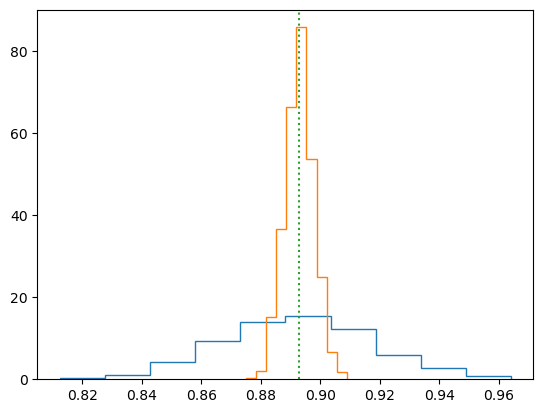

In [3]:
def f(x):
    return np.exp(-np.abs(x**3))

# Compute the integral using quad form comparison
I0, err, info = scipy.integrate.quad(f, 0.0, np.inf, full_output = True)
print("Integral from scipy.quad = %g with error %g (%d function evaluations)" % 
      (I0, err, info['neval']))

# Number of samples for the MC integration
N = 10**4

# Now do the integration 1000 times for both uniform and Gaussian
n_trials = 1000
I_arr = np.zeros(n_trials)
I2_arr = np.zeros(n_trials)

for i in range(n_trials):
    I_arr[i], err = integrate_MC(f, N)
    I2_arr[i], err2 = integrate_MC(f, N, sampling = 'gaussian')
    
I_mean = np.mean(I_arr)
I_std = np.std(I_arr)
print("Uniform: I = %g +- %g; frac err = %g; error estimate = %g" % (I_mean, I_std, I_std/I_mean, err))

I2_mean = np.mean(I2_arr)
I2_std = np.std(I2_arr)
print("Gaussian: I = %g +- %g; frac err = %g; error estimate = %g" % (I2_mean, I2_std, I2_std/I2_mean, err2))

counts, bins = np.histogram(I_arr, bins=10, density = True)
plt.stairs(counts, bins)    
counts, bins = np.histogram(I2_arr, bins=10, density = True)
plt.stairs(counts, bins)
plt.plot([I0, I0], (0,1.05*max(counts)), ":")
plt.ylim((0,1.05*max(counts)))
plt.show()

Notes:

- if you try different $N$ values, you'll see that the fractional error scales $\propto 1/\sqrt{N}$.

- since our estimate for the integral is the mean value of the $N$ samples of $f(x)/p(x)$, another way to estimate the error in the integration is to calculate the error in the mean (or ``standard error''),

$$\sigma_I^2 = {1\over N} \mathrm{Var}(f) = {1\over N} \left( \langle f^2\rangle - \langle f\rangle^2\right).$$

The function `integrate_MC` in the code above does this by returning $\sigma_I$ as `np.std(f(x)/p(x))/np.sqrt(N)`

The values agree well with the standard deviation calculated from the histograms.